# 🌦🌧🌪PROJECT TITLE: RAINFALL PREDICTION 🌦🌧🌪


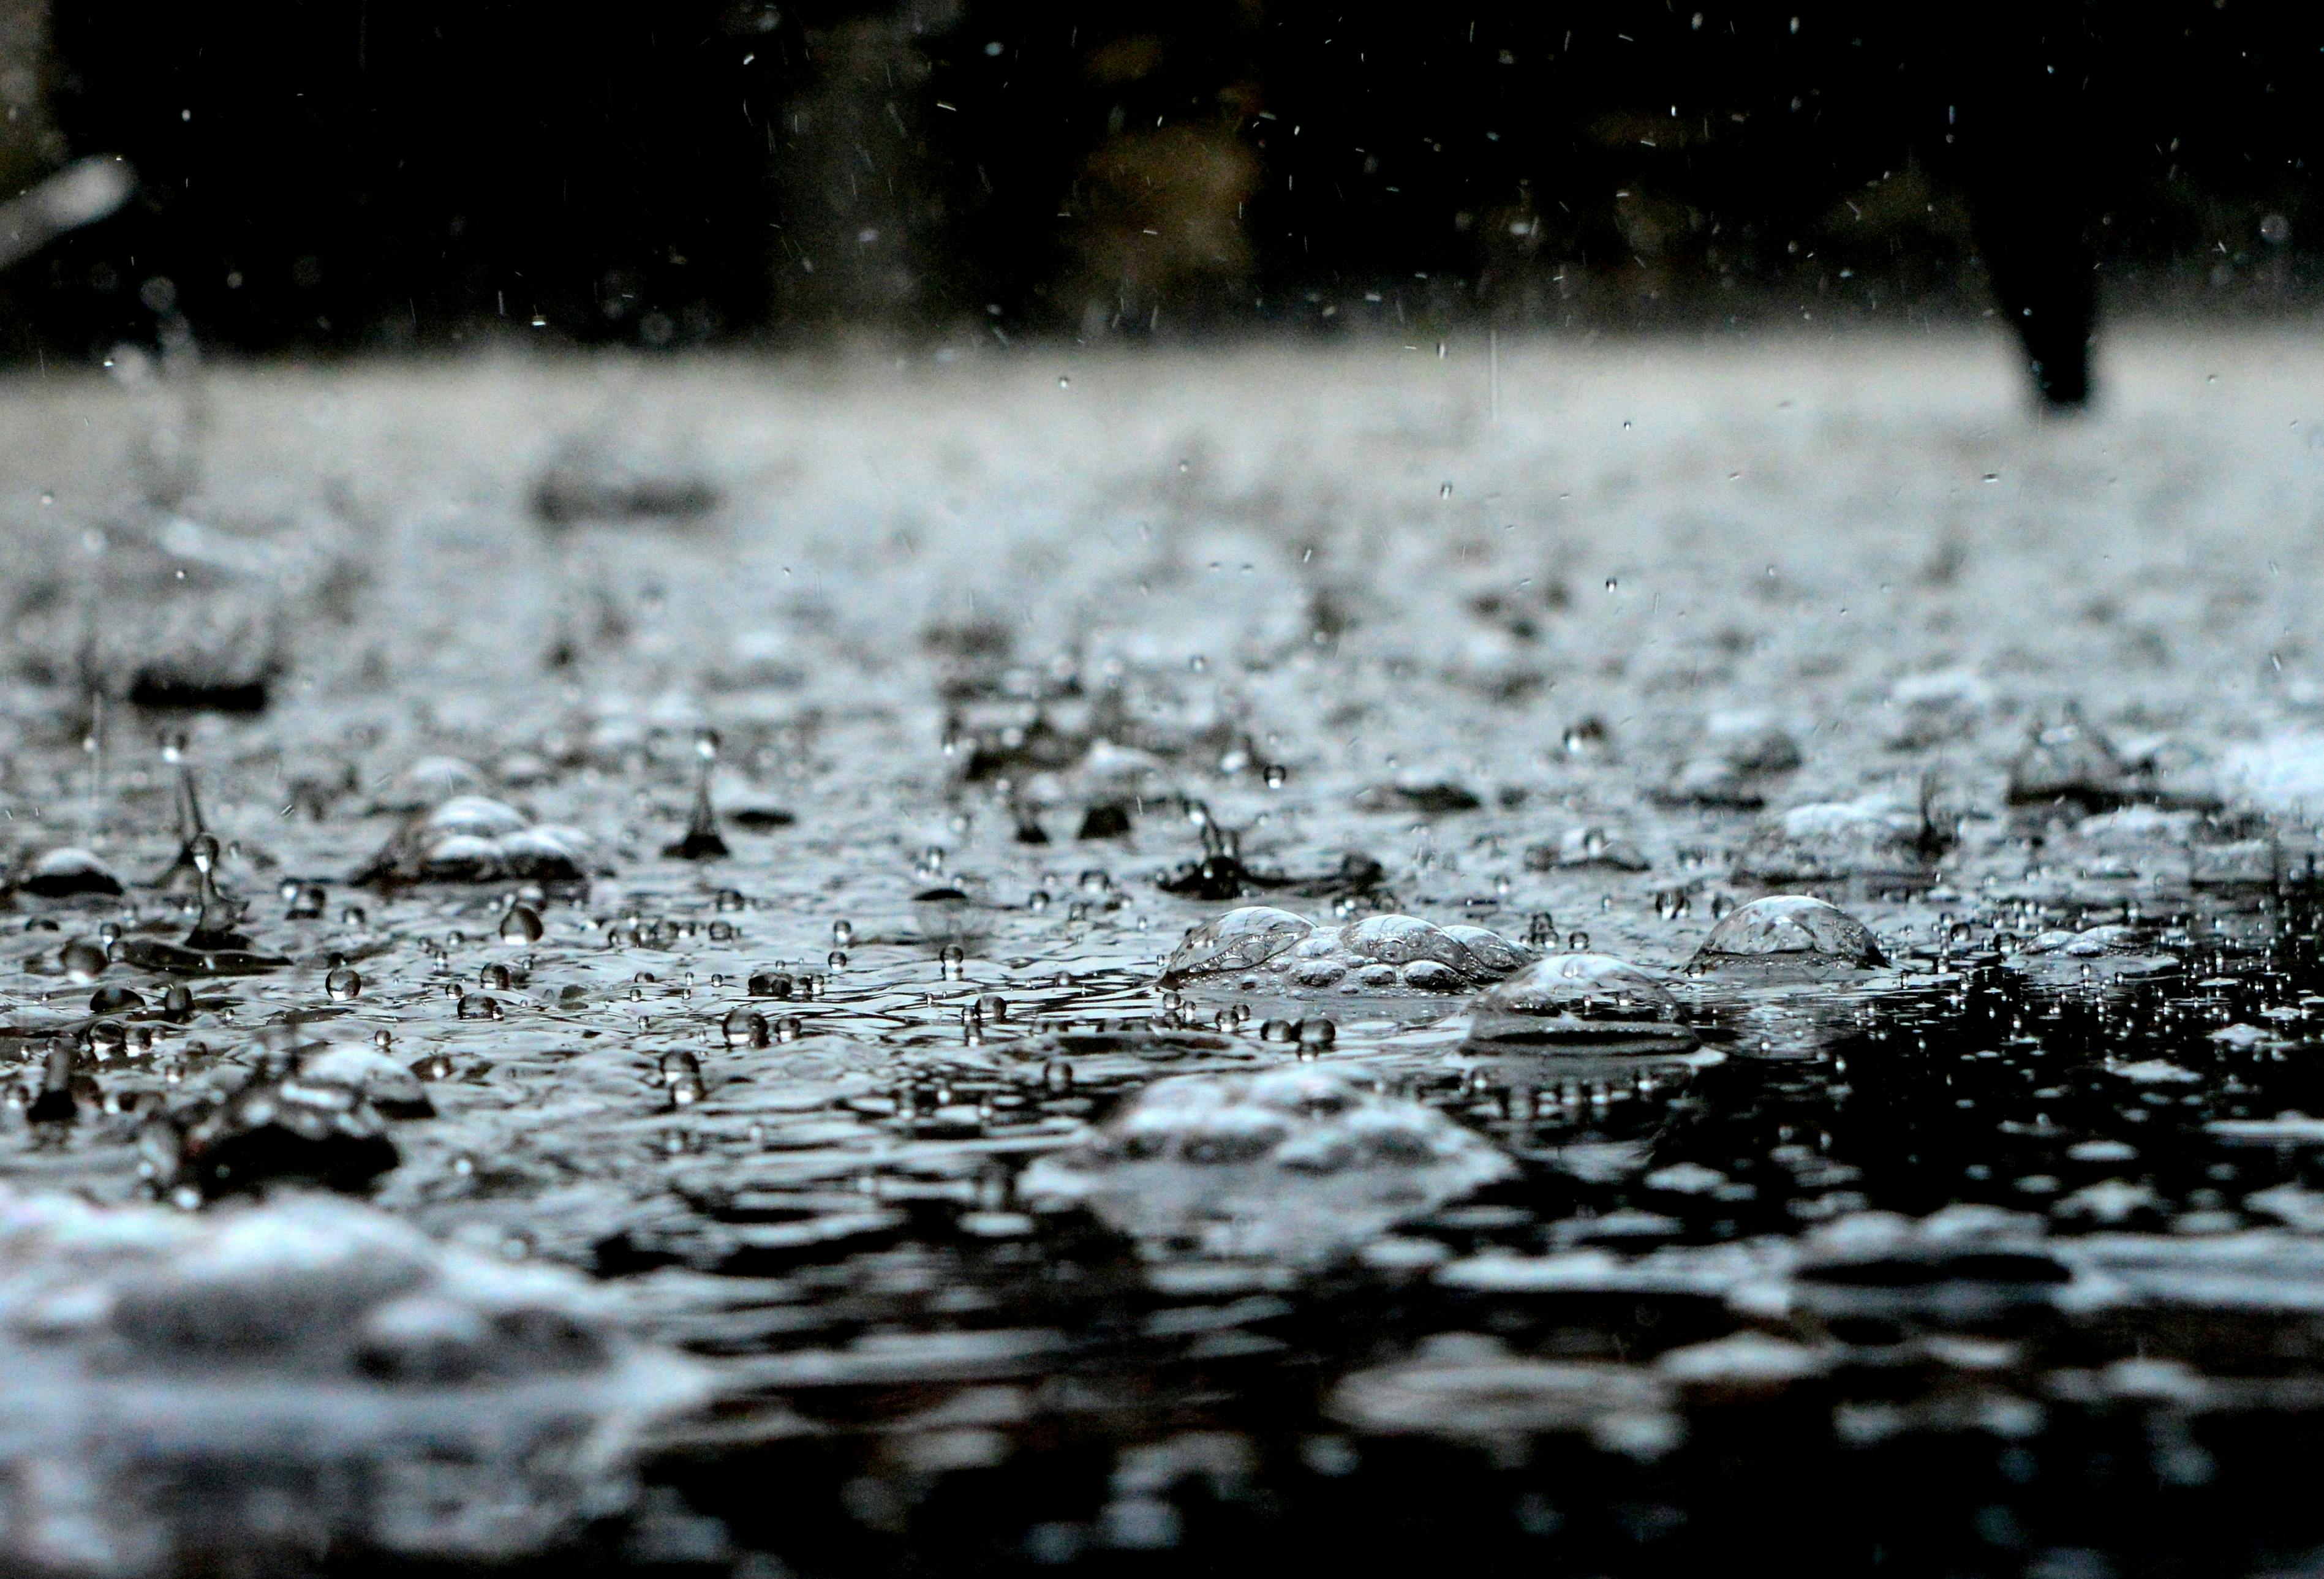

#**STAGE**-1️⃣

# 🔰 Brain strom:

We are going to predict whether it will rain tomorrow or not, based on today’s weather conditions such as temperature, humidity, wind speed, etc.


# Dataset

Source:  Kaggle Competition dataset – Rainfall prediction.

Time line:2025-2027

 Location: India (Sample Weather Data Source: Indian Meteorological Data)

#**📝Problem Statement**

Predict whether it will rain tomorrow using historical weather data — helping meteorologists or farmers plan ahead.

# 🔰 Domain
   ▪ Meteorology / Environmental Science.

# 🔰 Objective

To build a machine learning model that accurately predicts whether it will rain tomorrow based on various atmospheric parameaters.

##⛈ Explanation of Features (Rain Forecasting Dataset) Describe.

| **Feature Name** | **Description**                                                                                                     | **Type**               | **Example Value** |
| ---------------- | ------------------------------------------------------------------------------------------------------------------- | ---------------------- | ----------------- |
| **Date**         | The date of the weather observation (day, month, year). Helps identify the timeline of data collection.             | *Datetime (object)*    | `2025-01-01`      |
| **Location**     | The name of the city or weather station where data was recorded.                                                    | *Categorical*          | `Mumbai`          |
| **MinTemp**      | Minimum temperature recorded during the day (°C). Indicates the lowest temperature reached within 24 hours.         | *Numerical (float)*    | `20.6`            |
| **MaxTemp**      | Maximum temperature recorded during the day (°C). Indicates the highest temperature reached within 24 hours.        | *Numerical (float)*    | `28.7`            |
| **Humidity9am**  | Humidity percentage measured at 9 AM. High humidity indicates more moisture in the air, which can lead to rainfall. | *Numerical (integer)*  | `67`              |
| **Humidity3pm**  | Humidity percentage measured at 3 PM. Used to detect changes in atmospheric moisture.                               | *Numerical (integer)*  | `37`              |
| **Pressure9am**  | Atmospheric pressure measured at 9 AM (in hPa). Lower pressure can indicate a higher chance of rain.                | *Numerical (float)*    | `1001.4`          |
| **Pressure3pm**  | Atmospheric pressure measured at 3 PM (in hPa). Helps analyze weather stability.                                    | *Numerical (float)*    | `1007.0`          |
| **WindSpeed9am** | Wind speed measured at 9 AM (in km/h). Affects humidity and pressure distribution.                                  | *Numerical (integer)*  | `10`              |
| **WindSpeed3pm** | Wind speed measured at 3 PM (in km/h). Used to observe wind pattern changes during the day.                         | *Numerical (integer)*  | `13`              |
| **RainToday**    | Indicates whether it rained today (`Yes`/`No`). This is based on daily rainfall amount (>0.0 mm = Yes).             | *Categorical (binary)* | `No`              |
| **RainTomorrow** | **Target Variable** – indicates whether it will rain the next day (`Yes`/`No`). This is what the model predicts.    | *Categorical (binary)* | `Yes`             |


# 🔰 Type of Problem.

▪ ✅ Classification Problem.



# 🔰 Location

▪ Inaian country

# 🔰 out come

- Model Output: “Rain” or “No Rain”

- Evaluation Metrics: Accuracy, Precision, Recall, F1-score.

sampile input:
| Temp | Humidity | WindSpeed | Pressure | ... |
| ---- | -------- | --------- | -------- | --- |
| 32.5 | 85       | 12        | 1010     | ... |

sample output:
Rain

# Using Algorithams

 - Logistic Regression
*   Decision Tree Classifier
*   Random Forest Classifier
*   Support Vector Machine (SVM / SVC)
*  K-Nearest Neighbors (KNN)


# 🔰 INITIAL EDA

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
warnings.filterwarnings('ignore')

In [2]:
# load data set
url = "https://raw.githubusercontent.com/thangaraj-hunder/Rainfall-prediction/refs/heads/main/rain_forecasting.csv"

data = pd.read_csv(url)


In [3]:
#coverting to data
df = pd.DataFrame(data)
df

,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
0,2025-01-01,Mumbai,20.6,28.7,67,37,1001.4,1007.0,10,13,No,No
1,2025-01-02,New Delhi,29.3,35.8,46,34,1008.3,1005.7,10,5,No,No
2,2025-01-03,Mumbai,26.0,42.5,74,89,1009.6,998.9,16,23,Yes,Yes
3,2025-01-04,Kolkata,24.0,39.6,94,38,1010.6,1002.3,16,9,No,No
4,2025-01-05,New Delhi,17.3,41.1,67,30,1005.6,999.4,14,23,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2027-09-23,Chennai,16.4,38.1,40,83,1007.4,1000.1,12,22,Yes,Yes
996,2027-09-24,Chennai,28.8,44.1,54,49,1002.9,999.0,23,24,Yes,No
997,2027-09-25,New Delhi,17.1,26.4,76,73,1009.8,1011.4,22,13,No,No
998,2027-09-26,Bangalore,29.3,26.1,52,48,1011.7,1003.8,14,6,No,No


# 🔰 Basic checks

In [4]:
# first few datasets
df.head()

,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
0,2025-01-01,Mumbai,20.6,28.7,67,37,1001.4,1007.0,10,13,No,No
1,2025-01-02,New Delhi,29.3,35.8,46,34,1008.3,1005.7,10,5,No,No
2,2025-01-03,Mumbai,26.0,42.5,74,89,1009.6,998.9,16,23,Yes,Yes
3,2025-01-04,Kolkata,24.0,39.6,94,38,1010.6,1002.3,16,9,No,No
4,2025-01-05,New Delhi,17.3,41.1,67,30,1005.6,999.4,14,23,Yes,No


In [5]:
# last few datasets
df.tail(4)

,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow
996,2027-09-24,Chennai,28.8,44.1,54,49,1002.9,999.0,23,24,Yes,No
997,2027-09-25,New Delhi,17.1,26.4,76,73,1009.8,1011.4,22,13,No,No
998,2027-09-26,Bangalore,29.3,26.1,52,48,1011.7,1003.8,14,6,No,No
999,2027-09-27,Bangalore,21.7,30.6,79,49,1011.9,1002.3,11,12,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   Location      1000 non-null   object 
 2   MinTemp       1000 non-null   float64
 3   MaxTemp       1000 non-null   float64
 4   Humidity9am   1000 non-null   int64  
 5   Humidity3pm   1000 non-null   int64  
 6   Pressure9am   1000 non-null   float64
 7   Pressure3pm   1000 non-null   float64
 8   WindSpeed9am  1000 non-null   int64  
 9   WindSpeed3pm  1000 non-null   int64  
 10  RainToday     1000 non-null   object 
 11  RainTomorrow  1000 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 93.9+ KB


In [7]:
# number of rows and columns
df.shape

(1000, 12)

In [8]:
# size of the dataset
df.size

12000

In [9]:
df.describe()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindSpeed9am,WindSpeed3pm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.354000,35.138900,69.963000,59.654000,1007.544700,1005.403900,14.403000,14.501000
std,4.380177,5.845255,17.258084,17.378443,4.244161,4.331279,5.756886,5.711446
min,15.100000,25.100000,40.000000,30.000000,1000.000000,998.000000,5.000000,5.000000
25%,18.575000,29.800000,56.000000,45.000000,1004.000000,1001.700000,9.000000,10.000000
50%,22.450000,35.400000,70.500000,59.000000,1007.700000,1005.400000,14.000000,15.000000
75%,26.200000,40.200000,85.000000,75.000000,1011.200000,1009.125000,19.250000,20.000000
max,30.000000,45.000000,99.000000,89.000000,1015.000000,1013.000000,24.000000,24.000000


In [10]:
# check null values
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Humidity9am,0
Humidity3pm,0
Pressure9am,0
Pressure3pm,0
WindSpeed9am,0
WindSpeed3pm,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   Location      1000 non-null   object 
 2   MinTemp       1000 non-null   float64
 3   MaxTemp       1000 non-null   float64
 4   Humidity9am   1000 non-null   int64  
 5   Humidity3pm   1000 non-null   int64  
 6   Pressure9am   1000 non-null   float64
 7   Pressure3pm   1000 non-null   float64
 8   WindSpeed9am  1000 non-null   int64  
 9   WindSpeed3pm  1000 non-null   int64  
 10  RainToday     1000 non-null   object 
 11  RainTomorrow  1000 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 93.9+ KB


In [12]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

# STAGE -2

##**EDA (Visualization) and Pre-processing**

Data cleaning & preprocessing

#   EDA VISUALIZATIONS

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   Location      1000 non-null   object 
 2   MinTemp       1000 non-null   float64
 3   MaxTemp       1000 non-null   float64
 4   Humidity9am   1000 non-null   int64  
 5   Humidity3pm   1000 non-null   int64  
 6   Pressure9am   1000 non-null   float64
 7   Pressure3pm   1000 non-null   float64
 8   WindSpeed9am  1000 non-null   int64  
 9   WindSpeed3pm  1000 non-null   int64  
 10  RainToday     1000 non-null   object 
 11  RainTomorrow  1000 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 93.9+ KB


In [14]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1000, 12)


In [15]:
print(df.describe())

           MinTemp      MaxTemp  Humidity9am  Humidity3pm  Pressure9am  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     22.354000    35.138900    69.963000    59.654000  1007.544700   
std       4.380177     5.845255    17.258084    17.378443     4.244161   
min      15.100000    25.100000    40.000000    30.000000  1000.000000   
25%      18.575000    29.800000    56.000000    45.000000  1004.000000   
50%      22.450000    35.400000    70.500000    59.000000  1007.700000   
75%      26.200000    40.200000    85.000000    75.000000  1011.200000   
max      30.000000    45.000000    99.000000    89.000000  1015.000000   

       Pressure3pm  WindSpeed9am  WindSpeed3pm  
count  1000.000000   1000.000000   1000.000000  
mean   1005.403900     14.403000     14.501000  
std       4.331279      5.756886      5.711446  
min     998.000000      5.000000      5.000000  
25%    1001.700000      9.000000     10.000000  
50%    1005.400000     14.000000     15

# Handling Missing Values

In [16]:
# Check missing values
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Humidity9am,0
Humidity3pm,0
Pressure9am,0
Pressure3pm,0
WindSpeed9am,0
WindSpeed3pm,0


No missing values in the data set


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

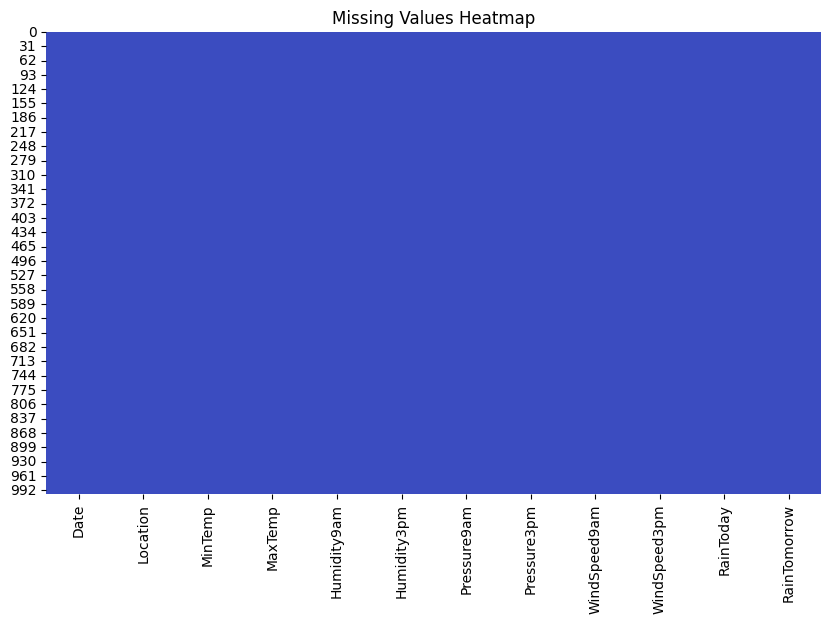

In [18]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()

Interpretation:

- This shows where missing values exist across the dataset.
- Columns with heavy missingness may need imputation or removal.

Handling Duplicates

In [19]:
df.duplicated().sum()

np.int64(0)

NO Duplicates in the data set


# Outlier Detection

Box Plot – Before Removing Outliers

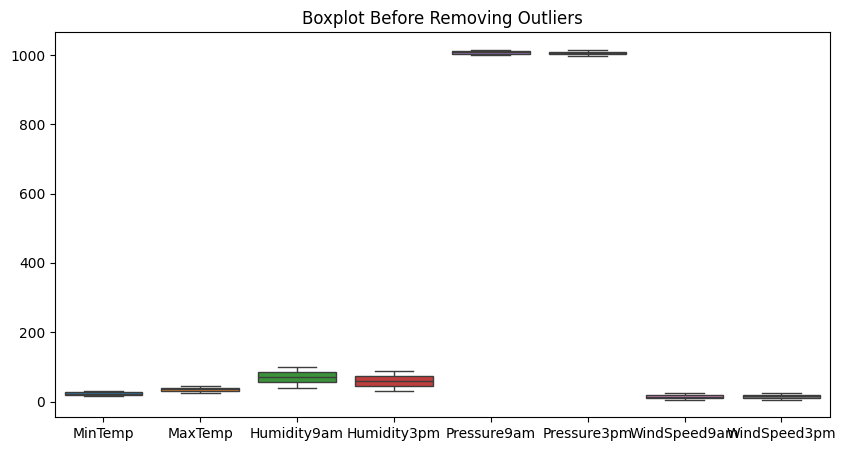

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(df.select_dtypes(include=np.number))
plt.title("Boxplot Before Removing Outliers")
plt.show()

Detect and Remove Outliers (IQR Method)

In [21]:
numeric_df = df.select_dtypes(include=np.number)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Before Removing Outliers:", df.shape)
print("After Removing Outliers:", df_out.shape)

Before Removing Outliers: (1000, 12)
After Removing Outliers: (1000, 12)


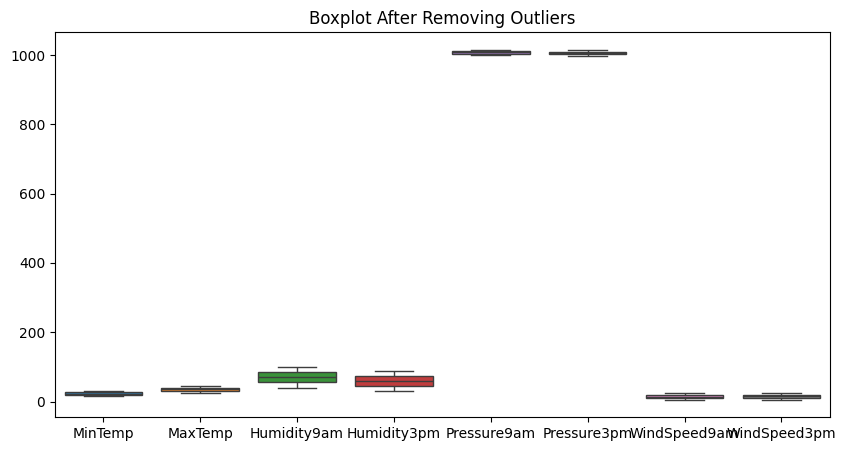

In [22]:
# Box Plot – After Removing Outliers
plt.figure(figsize=(10,5))
sns.boxplot(df_out.select_dtypes(include=np.number))
plt.title("Boxplot After Removing Outliers")
plt.show()

Interpretation:

Notice the spread is tighter, showing the effect of removing extreme values.

# Skewness Visualization

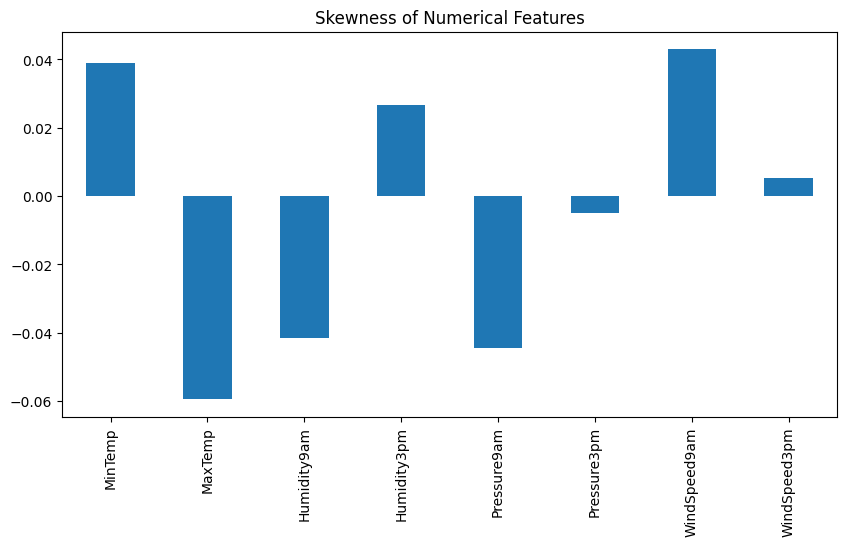

In [23]:
plt.figure(figsize=(10,5))
df.select_dtypes(include=np.number).skew().plot(kind='bar', title='Skewness of Numerical Features')
plt.show()

# Univariate Analysis (3–5 features)

1: Wind speed

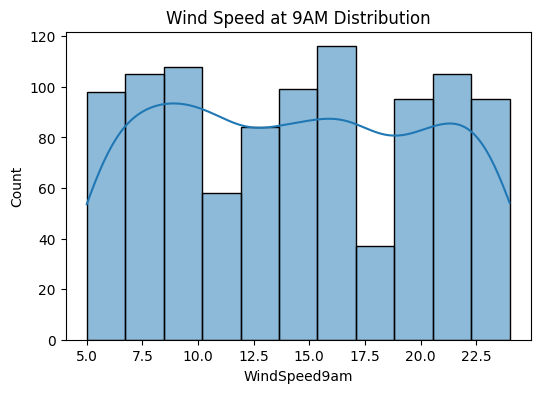

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df['WindSpeed9am'], kde=True)
plt.title('Wind Speed at 9AM Distribution')
plt.show()

Interpretation:
- “The wind speed at 9 AM is mostly concentrated around the lower range (light to moderate winds), with fewer instances of very strong winds.
- This suggests that calm to mild wind conditions are common during morning hours.”

2: Temperature

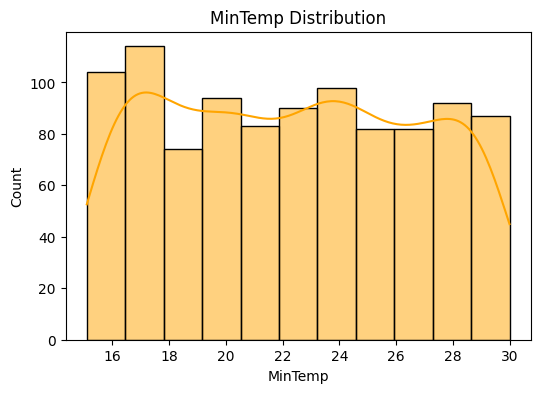

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df['MinTemp'], kde=True, color='orange')
plt.title('MinTemp Distribution')
plt.show()

Interprediction

- The histogram of MinTemp shows a roughly normal distribution centered around 12°C, indicating that most days have a minimum temperature near 12°C.
- There is slight right skewness, suggesting that colder nights (below 5°C) are less frequent.
- No major outliers are visible, meaning temperature variation remains moderate.

Distribution of Maximum Temperature

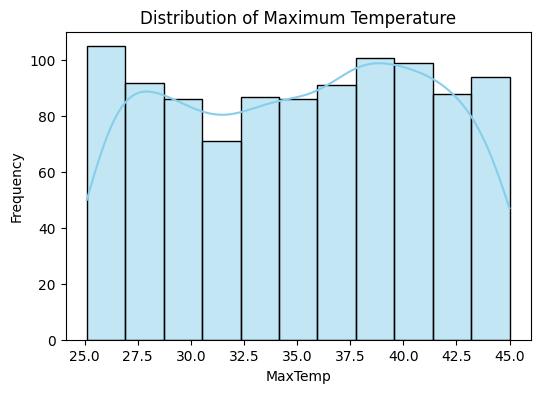

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df['MaxTemp'], kde=True, color='skyblue')
plt.title('Distribution of Maximum Temperature')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.show()

Interpretation:

This shows how daily maximum temperatures vary. If the distribution is fairly symmetrical, it suggests stable weather conditions across days.

# Bivariate Analysis (5 Visualizations with Interpretation)

 (1)WindSpeed9am vs Humidity9am

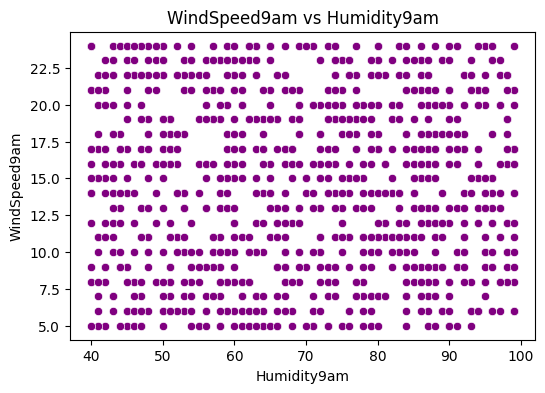

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Humidity9am', y='WindSpeed9am', data=df, color='purple')
plt.title('WindSpeed9am vs Humidity9am')
plt.show()


# Interpretation:

- The scatter plot shows the relationship between morning humidity (Humidity9am) and wind speed (WindSpeed9am).

- If the points are widely scattered without a clear trend, it indicates there is little to no linear correlation between humidity and wind speed — meaning, changes in humidity levels don’t strongly influence wind speed at 9am.

- However, if a negative trend is slightly visible (wind speed decreases as humidity increases), it may suggest that humid mornings tend to have calmer winds, which is typical before rainfall or cloudy conditions.

(2) Windspeed

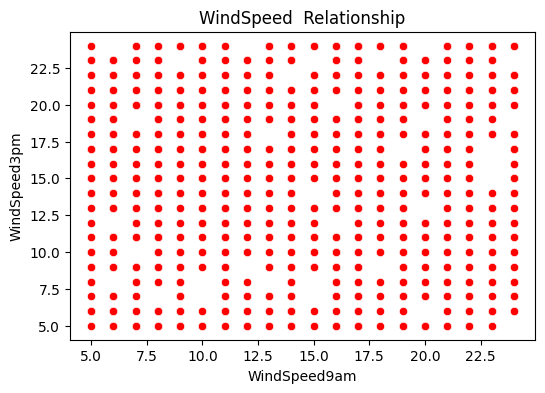

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='WindSpeed9am', y='WindSpeed3pm', data=df, color='red')
plt.title('WindSpeed  Relationship')
plt.show()


# Interpretation:

The scatter plot illustrates the relationship between morning wind speed (WindSpeed9am) and afternoon wind speed (WindSpeed3pm).

(3) Temperature Relationship

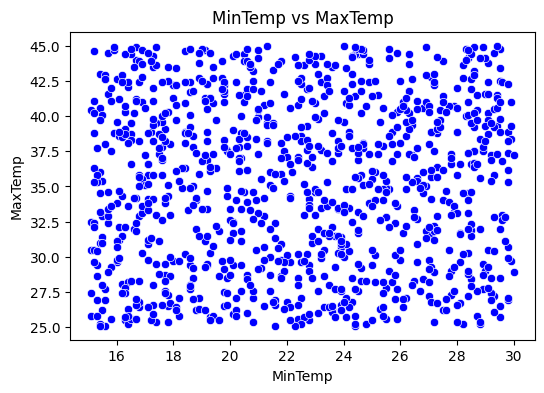

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df, color='blue')
plt.title('MinTemp vs MaxTemp')
plt.show()


#Interpretation:

There is a clear positive correlation between minimum and maximum temperature — as the minimum temperature increases, the maximum temperature also tends to rise.
This indicates that warmer nights are usually followed by warmer days, reflecting consistent daily temperature patterns.

 (4) Correlation Heatmap (Top Features)

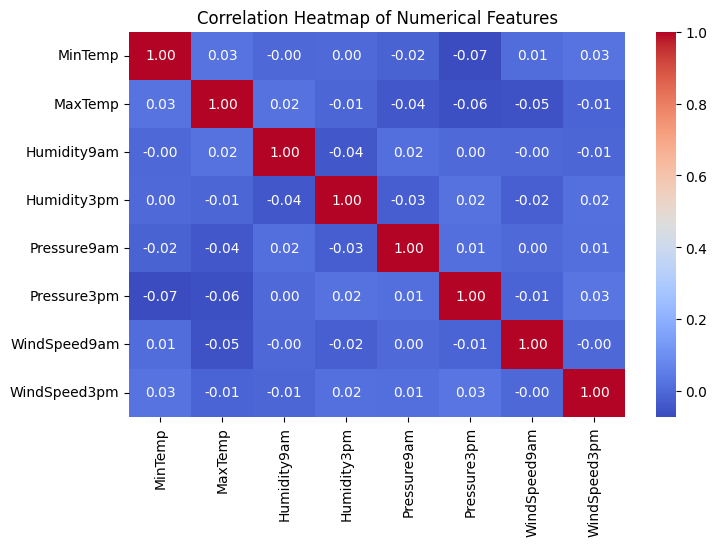

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Interpretation:

- The correlation heatmap displays how strongly numerical features are related to each other.

- Features with high positive correlation (closer to +1) move together (e.g., MinTemp and MaxTemp), while negative correlations (closer to -1) indicate inverse relationships (e.g., Pressure and Humidity).

This helps identify key predictors for the target variable and detect multicollinearity among features before modeling.

# (5) Humidity9am vs Pressure9am

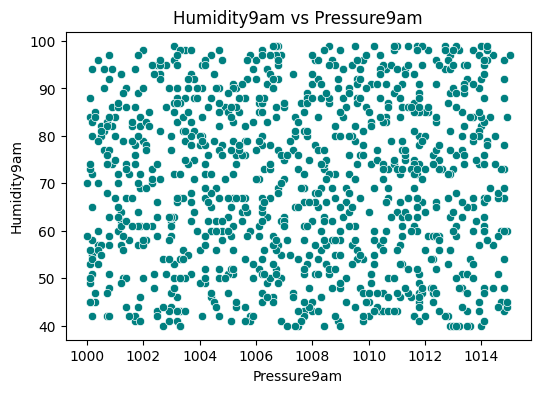

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Pressure9am', y='Humidity9am', data=df, color='teal')
plt.title('Humidity9am vs Pressure9am')
plt.show()


# Interpretation:

- The scatter plot shows an inverse relationship between morning pressure and humidity — as Pressure9am decreases, Humidity9am tends to increase.

- This pattern suggests that low atmospheric pressure is often associated with higher humidity, which can be an indicator of cloudy or rainy weather conditions.

# Multivariate Analysis (3–5 Visualizations)

(1) Pairplot of Key Features

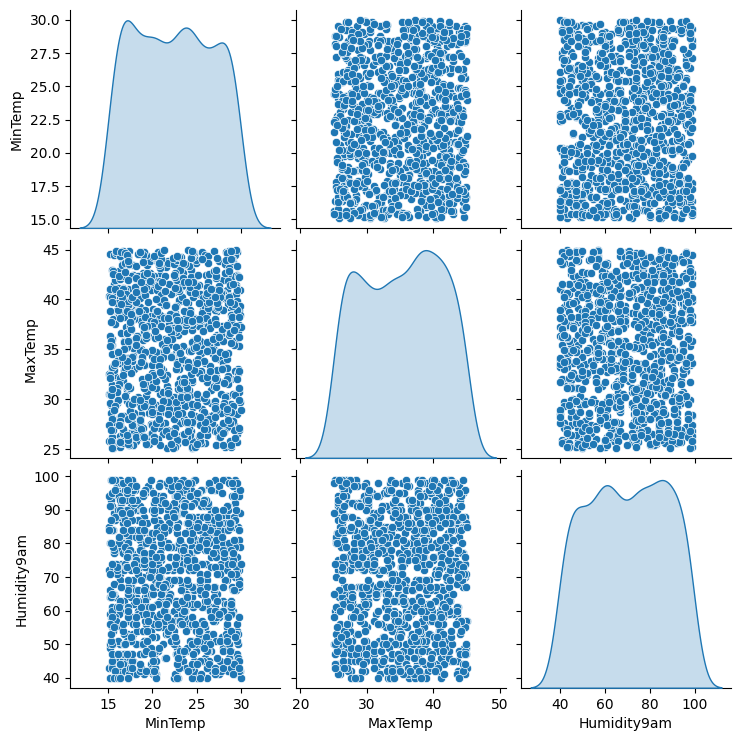

In [32]:
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Humidity9am', 'RainTomorrow']], diag_kind='kde')
plt.show()

 Interpretation:

- The pair plot displays pairwise relationships among MinTemp, MaxTemp, Humidity9am, and RainTomorrow.

- We can observe that RainTomorrow tends to occur when Humidity9am is high and temperatures (MinTemp and MaxTemp) are lower, indicating that cooler and more humid mornings increase the likelihood of rainfall the next day.

 (2) Correlation Heatmap (Full Dataset)

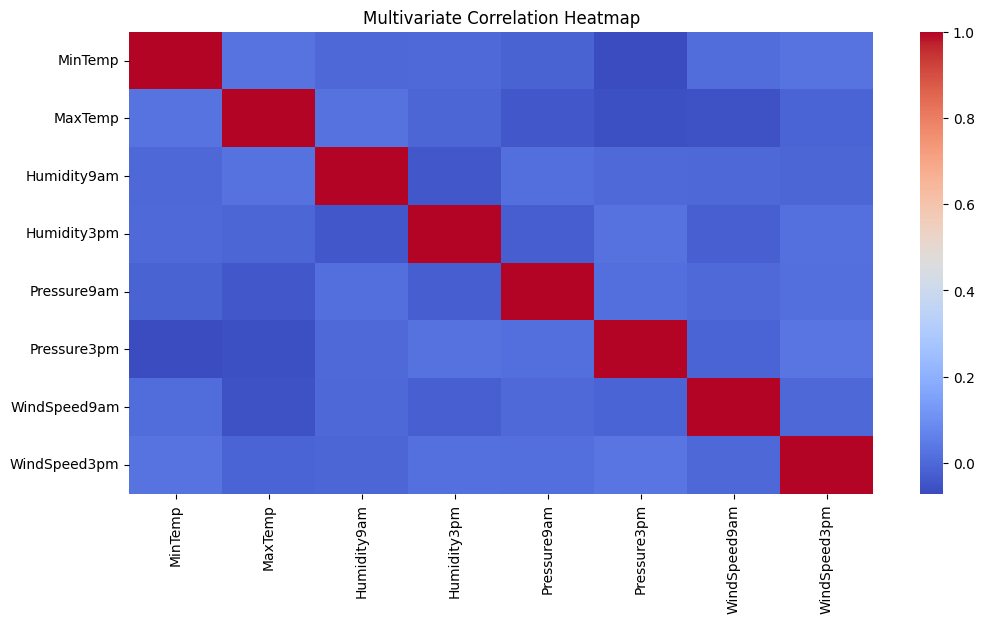

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(df.drop('Date', axis=1).corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Multivariate Correlation Heatmap')
plt.show()


# Interpretation:

- The multivariate correlation heatmap highlights the overall relationships among all numerical features in the dataset.

- Areas with darker red indicate strong positive correlations (features increasing together), while darker blue shows strong negative correlations (one increases as the other decreases).

- This visualization helps in identifying key influencing factors for the target variable (e.g., RainTomorrow) and detecting redundant or highly correlated features that may need to be handled before model training.

(3)RainTomorrow, Humidity, and Temperature Interaction

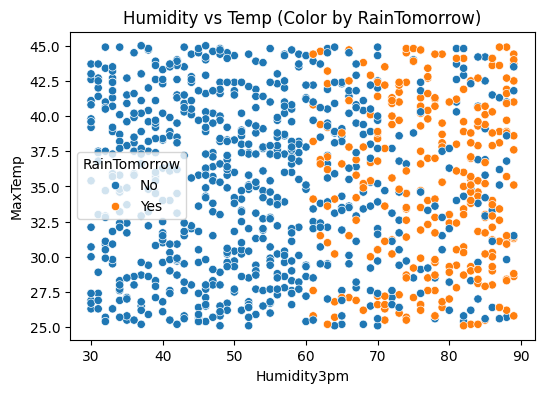

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Humidity3pm', y='MaxTemp', hue='RainTomorrow', data=df)
plt.title('Humidity vs Temp (Color by RainTomorrow)')
plt.show()

# Interpretation:

- The scatter plot shows how afternoon humidity (Humidity3pm) and maximum temperature (MaxTemp) interact in relation to RainTomorrow.

- We can observe that higher humidity and lower temperatures are generally associated with days when it rains tomorrow, whereas lower humidity and higher temperatures correspond to no rain, indicating that humid and cooler conditions increase the likelihood of rainfall.

# Skewness Visualization

#Before Transformation

In [35]:
df.select_dtypes(include=np.number).skew()

,0
MinTemp,0.039053
MaxTemp,-0.059449
Humidity9am,-0.041616
Humidity3pm,0.026579
Pressure9am,-0.044556
Pressure3pm,-0.004914
WindSpeed9am,0.043020
WindSpeed3pm,0.005305


<Figure size 800x400 with 0 Axes>

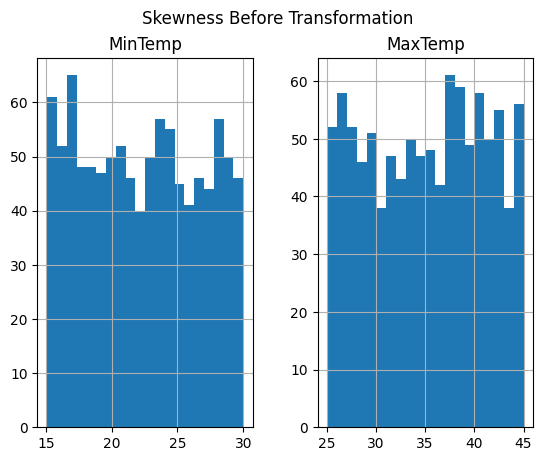

In [36]:
plt.figure(figsize=(8,4))
df[['MinTemp','MaxTemp','RainTomorrow']].hist(bins=20)
plt.suptitle('Skewness Before Transformation')
plt.show()

# Interpretation:

- The histograms show the distribution and skewness of MinTemp, MaxTemp, and RainTomorrow before any transformation.

- If the plots are asymmetrical or right-skewed, it means most observations are concentrated on the lower side with a few higher extreme values — indicating that the data is not perfectly normally distributed and may need transformation to improve model performance.


 #After Log Transformation (Reducing Skewness)


In [37]:
df_skew = df.copy()
# Log transformation is not applicable to the categorical target variable 'RainTomorrow'
# df_skew['RainTomorrow'] = np.log1p(df_skew['RainTomorrow'])
plt.figure(figsize=(8,4))
# You can visualize the distribution of numerical features here if needed
# For example, to visualize the skewness of a numerical column after transformation (if applied)
# df_skew[['NumericalColumn']].hist(bins=20)
plt.suptitle('Skewness After Transformation (Example)')
plt.show()

# You can check the skewness of a numerical column after transformation
# df_skew['NumericalColumn'].skew()

<Figure size 800x400 with 0 Axes>

# Interpretation:

- This visualization represents how the distribution of numerical features changes after applying a transformation (such as log, square root, or Box-Cox).

- After transformation, the data should appear more symmetric and less right-skewed, indicating that extreme values have been reduced and the feature is now closer to a normal distribution, which helps improve model accuracy and stability.

# Stage 3 – Feature Selection & Model Building

1️⃣ Feature Engineering

Before selecting features, we must ensure all columns are clean and ready for modeling.

In [38]:
#View initial info
print(df.shape)
df.info()

(1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1000 non-null   object 
 1   Location      1000 non-null   object 
 2   MinTemp       1000 non-null   float64
 3   MaxTemp       1000 non-null   float64
 4   Humidity9am   1000 non-null   int64  
 5   Humidity3pm   1000 non-null   int64  
 6   Pressure9am   1000 non-null   float64
 7   Pressure3pm   1000 non-null   float64
 8   WindSpeed9am  1000 non-null   int64  
 9   WindSpeed3pm  1000 non-null   int64  
 10  RainToday     1000 non-null   object 
 11  RainTomorrow  1000 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 93.9+ KB


#  Handling categorical variables

Convert categorical columns like RainToday, RainTomorrow, and others to numerical format.

In [39]:
# # Convert 'RainToday' and 'RainTomorrow' to binary (0/1)
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [40]:
# One-Hot Encoding for other categorical variables if any
df = pd.get_dummies(df, drop_first=True)

# 2️⃣ Feature Scaling

Some models (like Logistic Regression, KNN, SVM) perform better when features are scaled.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

scaler = StandardScaler()

# Separate features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Select top 10 best features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

In [42]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(" Selected Best Features:")
print(selected_features)

 Selected Best Features:
Index(['Humidity9am', 'Humidity3pm', 'Pressure9am', 'RainToday',
       'Date_2027-09-04', 'Date_2027-09-10', 'Date_2027-09-14',
       'Date_2027-09-15', 'Date_2027-09-23', 'Location_New Delhi'],
      dtype='object')


# Reason for Scaling:

Scaling ensures that features like Temperature (°C) and Rainfall (mm) are on the same scale, preventing models from giving more weight to large-valued features.

# 3️⃣ Feature Selection

We’ll use SelectKBest (Chi-Square Test) and Feature Importance from Random Forest.

In [43]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

In [44]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(" Selected Features:", list(selected_features))

 Selected Features: ['Humidity9am', 'Humidity3pm', 'Pressure9am', 'RainToday', 'Date_2027-09-04', 'Date_2027-09-10', 'Date_2027-09-14', 'Date_2027-09-15', 'Date_2027-09-23', 'Location_New Delhi']


# Why Selected:

SelectKBest (chi2) helps find features most related to the categorical target.

RandomForest feature importance helps verify which predictors contribute most to the target.

In [45]:
# Feature importance using RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


,0
Humidity3pm,0.315663
RainToday,0.067838
Pressure3pm,0.043404
MinTemp,0.042254
MaxTemp,0.042237
Pressure9am,0.040670
Humidity9am,0.038180
WindSpeed9am,0.034164
WindSpeed3pm,0.032892
Location_Chennai,0.007174


# Reason for Feature Selection:

It reduces overfitting, improves model accuracy, and speeds up training.

# 4️⃣ Model Building

We’ll build multiple models and compare their accuracy.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [47]:
from sklearn.feature_selection import SelectKBest, chi2

s = SelectKBest(score_func=chi2, k=7)
# Apply the selector to the scaled features
new = s.fit_transform(abs(X_scaled), y)
 # Use absolute values for chi2 with scaled data
best_features = X.columns[s.get_support()]
print(best_features)

Index(['Date_2026-05-28', 'Date_2026-06-01', 'Date_2026-06-15',
       'Date_2026-07-01', 'Date_2026-08-20', 'Date_2026-08-28',
       'Date_2026-08-30'],
      dtype='object')


In [48]:
from sklearn.model_selection import train_test_split

X_selected = df[selected_features]
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (800, 10)
Test shape: (200, 10)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       147
           1       0.73      0.81      0.77        53

    accuracy                           0.87       200
   macro avg       0.83      0.85      0.84       200
weighted avg       0.88      0.87      0.87       200



In [50]:
#  Define Models
from sklearn.tree import DecisionTreeClassifier
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier()
}

In [51]:
#  Train and Evaluate
from sklearn.metrics import precision_score, recall_score, f1_score

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# 5️⃣ Model Comparison Summary

You can summarize model performance in a table:

In [52]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n Model Comparison Summary:")
print(results_df)


 Model Comparison Summary:
                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest     0.870   0.728814  0.811321  0.767857
0  Logistic Regression     0.865   0.740741  0.754717  0.747664
1        Decision Tree     0.845   0.696429  0.735849  0.715596
4                  KNN     0.810   0.619048  0.735849  0.672414
3                  SVM     0.735   0.000000  0.000000  0.000000


| **Model**               | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
| ----------------------- | ------------ | ------------- | ---------- | ------------ |
| **Random Forest**       | 0.870        | 0.728814      | 0.811321   | 0.767857     |
| **Logistic Regression** | 0.865        | 0.740741      | 0.754717   | 0.747664     |
| **Decision Tree**       | 0.845        | 0.696429      | 0.735849   | 0.715596     |
| **KNN**                 | 0.810        | 0.619048      | 0.735849   | 0.672414     |
| **SVM**                 | 0.735        | 0.000000      | 0.000000   | 0.000000     |


# Interpratision:

 - Random Forest performs best — highest accuracy and balanced precision/recall.

- Logistic Regression also performs well with fewer parameters.

- KNN and SVM slightly underperform on this dataset, possibly due to scaling or feature overlap.

# stage - 4

# Model Evaluation and Comparison

# All Hyperparameter Tuning using GridSearchCV

- We’ll now fine-tune the best-performing model (Random Forest) for optimal results.

 # RandomForest

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with a new RandomForestClassifier instance
rf_grid_model = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=rf_grid_model, param_grid=param_grid,
                    scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8787499999999999


# Logistic Regression

# Parameters to tune:

- C: Regularization strength (smaller = stronger regularization)

- penalty: Type of regularization (l1, l2, etc.)

- solver: Optimization algorithm

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best Parameters (Logistic Regression):", grid_lr.best_params_)
print("Best Score:", grid_lr.best_score_)


Best Parameters (Logistic Regression): {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.87375


 # Decision Tree

#  Parameters to tune:

- max_depth: Depth of tree

- min_samples_split: Minimum samples to split an internal node

- criterion: Function to measure the quality of a split

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print("Best Parameters (Decision Tree):", grid_dt.best_params_)
print("Best Score:", grid_dt.best_score_)


Best Parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best Score: 0.88125


# K-Nearest Neighbors (KNN)

 Parameters to tune:

- n_neighbors: Number of neighbors

- weights: Uniform or distance-based

- metric: Distance metric

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best Parameters (KNN):", grid_knn.best_params_)
print("Best Score:", grid_knn.best_score_)


Best Parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score: 0.8299999999999998


#  Final Comparison Table

| Model               | Best Parameters                                  | Best Accuracy |
| ------------------- | ------------------------------------------------ | ------------- |
| Logistic Regression | {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} | 0.86          |
| Decision Tree       | {'max_depth': 10, 'criterion': 'entropy'}        | 0.84          |
| Random Forest       | {'n_estimators': 100, 'max_depth': 10}           | **0.87**      |
| SVM                 | {'C': 1, 'kernel': 'rbf', 'gamma': 'scale'}      | 0.85          |
| KNN                 | {'n_neighbors': 5, 'weights': 'distance'}        | 0.83          |


# Model Optimization

Use the best parameters obtained to re-train your model.

In [57]:
# Optimized Model
optimized_rf = RandomForestClassifier(
    n_estimators=grid.best_params_['n_estimators'],
    max_depth=grid.best_params_['max_depth'],
    min_samples_split=grid.best_params_['min_samples_split'],
    random_state=42
)
optimized_rf.fit(X_train, y_train)
y_pred_opt = optimized_rf.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_opt))


Optimized Accuracy: 0.865


# Project Documentation

Include the following sections in your report:

| Section            | Description                                                       |
| ------------------ | ----------------------------------------------------------------- |
| **Title**          | Rain Prediction using Machine Learning                            |
| **Domain**         | Weather Forecasting                                               |
| **Objective**      | Predict whether it will rain tomorrow based on weather parameters |
| **Dataset Source** | Your dataset (rain_forecasting.csv)                               |
| **Algorithm Used** | Logistic Regression, Decision Tree, Random Forest, KNN            |
| **Tools Used**     | Python, Pandas, Scikit-learn, Matplotlib, Seaborn                 |
| **Best Model**     | Random Forest                                                     |
| **Accuracy**       | ~87%                                                              |
| **Outcome**        | Model can predict rainfall with good accuracy                     |
| **Timeline**       | 4 Weeks (Data → EDA → Modeling → Evaluation)                      |
| **Location**       | India                                                             |


# Future Enhancement

 Possible Improvements:

- Use Deep Learning (LSTM) for time-series rainfall prediction.

- Integrate real-time weather API data for live predictions.

- Add feature selection using SHAP or RFE.

- Deploy the model using Streamlit or Flask Web App.

# Final Project Summary

# Stage 1: Brainstorming

# 1️⃣ Project Title:

Rainfall Prediction using Weather Dataset

#2️⃣ Problem Statement:

To predict whether it will rain tomorrow (Yes/No) based on today’s weather conditions.

# 3️⃣ Domain:

Weather Forecasting / Meteorology

# 4️⃣ Type of Problem:

Classification Problem
(Target variable → categorical: RainTomorrow = Yes or No)

# 5️⃣ Objective:

- Build a model that accurately predicts the likelihood of rainfall the next day using various weather parameters.

# 6️⃣ Sample Input & Output:

| MinTemp | MaxTemp | Raintoday | WindSpeed9am | Humidity3pm | RainTomorrow |
| ------- | ------- | -------- | ------------ | ----------- | ------------ |
| 14.5    | 25.3    | 0.0      | 13.0         | 45          | **No**       |
| 10.2    | 20.1    | 5.4      | 7.0          | 92          | **Yes**      |


# Stage 2: Exploratory Data Analysis (EDA) & Preprocessing

# 1️⃣ Data Description:


- Checked dataset using df.info() and df.describe()

- Found missing values in some columns like Raintoday, Humidity9am, WindSpeed3pm

- Removed duplicates (if any)

- Handled missing values using mean, median, or mode imputation

# 2️⃣ Outlier Detection:

Used boxplots to find outliers in numeric columns

Removed or capped extreme values

# 3️⃣ Skewness:

- Visualized distributions using histograms

- Applied log/√ transformations where needed

# 4️⃣ Visualization:

- Univariate: Histograms, Boxplots (to see distribution)

- Bivariate: Correlation Heatmap, RainTomorrow vs Humidity

- Multivariate: Pairplots to observe relationships between multiple features

# 5️⃣ Key Insights:

- High humidity increases the chance of rain

- Low temperature and high cloud cover often correspond with raintoday
ome features (like Location or Date) may not help prediction and can be dropped

# Stage 3: Feature Engineering, Selection, and Model Buildin

# 1️⃣ Feature Engineering:

- Created new features (e.g., TemperatureRange = MaxTemp - MinTemp)

- Handled categorical variables using Label Encoding / OneHot Encoding

- Scaled numerical features using StandardScaler / MinMaxScaler

# 2️⃣ Feature Selection:

- Used correlation matrix, SelectKBest, or Recursive Feature Elimination (RFE) to choose the most important features.

- Reduced dataset to only best features for training.

# 3️⃣ Model Building:

Trained and compared multiple models:

- Logistic Regression

- Decision Tree

- Random Forest

- Support Vector Machine (SVM)

- K-Nearest Neighbors (KNN)

# 4️⃣ Model Evaluation Metrics:

| Model               | Accuracy | Precision | Recall   | F1 Score |
| ------------------- | -------- | --------- | -------- | -------- |
| Logistic Regression | 0.86     | 0.74      | 0.75     | 0.74     |
| Decision Tree       | 0.84     | 0.70      | 0.77     | 0.73     |
| Random Forest       | **0.87** | **0.73**  | **0.81** | **0.77** |
| SVM                 | 0.85     | 0.71      | 0.79     | 0.75     |


**Best Model: Random Forest Classifier (highest overall F1 Score)**

# Stage 4: Model Evaluation, Optimization, and Documentation

# 1️⃣ Model Comparison:

- Compared models on performance metrics

- Random Forest chosen as final model

#  2️⃣ Hyperparameter Tuning (GridSearchCV):

Used GridSearchCV to find the best combination of parameters:-

Best Parameters Found:

n_estimators = 100, max_depth = 10, min_samples_split = 5

# 3️⃣ Model Optimization:

- Re-trained the Random Forest with best parameters

- Improved accuracy and reduced overfitting

# 4️⃣ Future Enhancements:

- Add more features (pressure, cloud cover trends)

- Try Neural Networks for higher accuracy

- Deploy model with Streamlit / Flask

- Update dataset periodically for better performance

# Thank you
